<a href="https://colab.research.google.com/github/ashwinadarsh/8803_Biomarker_Detection_in_OCT/blob/main/OCT_BIOMARKER_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This line is used to install datasets Python package.


In [ ]:
!pip install -U datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 8.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which i

This block of code includes essential imports for building and evaluating a deep learning model using PyTorch, along with dataset handling and performance metrics.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, Subset
from torchvision import transforms, models
from datasets import load_dataset
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt

##**Preprocessing and Dataset Setup**

#### Image Transformation Setup for Deep Learning Models

This code defines and applies image preprocessing transformations tailored to specific model architectures, particularly for computer vision tasks using PyTorch and torchvision.


#### `get_transform(arch)`:

This helper function generates a transformation pipeline based on the model architecture:

- If the architecture is `"inception_v3"`, it:
  - Converts images to **RGB** if they are not already.
  - Resizes images to **299x299** pixels (required input size for InceptionV3).
  - Converts the image to a **PyTorch tensor**.
  - Normalizes the image using **ImageNet statistics** (mean and standard deviation), which helps pretrained models perform better.

- For all other architectures (e.g., ResNet, VGG), it:
  - Applies the same preprocessing steps, but resizes the image to **224x224**, which is the standard input size for most models.

#### Why This Is Important:
- Pretrained models are sensitive to input size and color channels.

- Normalization with ImageNet stats ensures input compatibility.

- Dynamic handling of different architectures helps generalize the training pipeline for various models.

This setup ensures that the images are properly formatted for feeding into deep learning models, improving accuracy and training stability.

In [ ]:
# Helper function to create transforms based on architecture
def get_transform(arch):
    if arch == "inception_v3":
        # Inception v3 expects 299x299 images.
        return transforms.Compose([
            transforms.Lambda(lambda img: img.convert("RGB") if img.mode != "RGB" else img),
            transforms.Resize((299, 299)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
        ])
    else:
        # Other architectures expect 224x224 images.
        return transforms.Compose([
            transforms.Lambda(lambda img: img.convert("RGB") if img.mode != "RGB" else img),
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
        ])

# Updated transform: Convert image to RGB if needed, then resize, tensor conversion, and normalization.
transform = transforms.Compose([
    transforms.Lambda(lambda img: img.convert("RGB") if img.mode != "RGB" else img),
    transforms.Resize((299, 299)),  # InceptionV3 requires 299x299
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # ImageNet means
                         std=[0.229, 0.224, 0.225])   # ImageNet stds
])

In [ ]:
# Load the OLIVES dataset
olives = load_dataset('gOLIVES/OLIVES_Dataset', 'biomarker_detection', split='train')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

Resolving data files:   0%|          | 0/32 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/32 [00:00<?, ?it/s]

train-00000-of-00032.parquet:   0%|          | 0.00/446M [00:00<?, ?B/s]

train-00001-of-00032.parquet:   0%|          | 0.00/513M [00:00<?, ?B/s]

train-00002-of-00032.parquet:   0%|          | 0.00/489M [00:00<?, ?B/s]

train-00003-of-00032.parquet:   0%|          | 0.00/501M [00:00<?, ?B/s]

train-00004-of-00032.parquet:   0%|          | 0.00/485M [00:00<?, ?B/s]

train-00005-of-00032.parquet:   0%|          | 0.00/491M [00:00<?, ?B/s]

train-00006-of-00032.parquet:   0%|          | 0.00/505M [00:00<?, ?B/s]

train-00007-of-00032.parquet:   0%|          | 0.00/476M [00:00<?, ?B/s]

train-00008-of-00032.parquet:   0%|          | 0.00/504M [00:00<?, ?B/s]

train-00009-of-00032.parquet:   0%|          | 0.00/481M [00:00<?, ?B/s]

train-00010-of-00032.parquet:   0%|          | 0.00/475M [00:00<?, ?B/s]

train-00011-of-00032.parquet:   0%|          | 0.00/495M [00:00<?, ?B/s]

train-00012-of-00032.parquet:   0%|          | 0.00/508M [00:00<?, ?B/s]

train-00013-of-00032.parquet:   0%|          | 0.00/496M [00:00<?, ?B/s]

train-00014-of-00032.parquet:   0%|          | 0.00/496M [00:00<?, ?B/s]

train-00015-of-00032.parquet:   0%|          | 0.00/483M [00:00<?, ?B/s]

train-00016-of-00032.parquet:   0%|          | 0.00/462M [00:00<?, ?B/s]

train-00017-of-00032.parquet:   0%|          | 0.00/456M [00:00<?, ?B/s]

train-00018-of-00032.parquet:   0%|          | 0.00/490M [00:00<?, ?B/s]

train-00019-of-00032.parquet:   0%|          | 0.00/487M [00:00<?, ?B/s]

train-00020-of-00032.parquet:   0%|          | 0.00/492M [00:00<?, ?B/s]

train-00021-of-00032.parquet:   0%|          | 0.00/486M [00:00<?, ?B/s]

train-00022-of-00032.parquet:   0%|          | 0.00/484M [00:00<?, ?B/s]

train-00023-of-00032.parquet:   0%|          | 0.00/496M [00:00<?, ?B/s]

train-00024-of-00032.parquet:   0%|          | 0.00/496M [00:00<?, ?B/s]

train-00025-of-00032.parquet:   0%|          | 0.00/424M [00:00<?, ?B/s]

train-00026-of-00032.parquet:   0%|          | 0.00/294M [00:00<?, ?B/s]

train-00027-of-00032.parquet:   0%|          | 0.00/429M [00:00<?, ?B/s]

train-00028-of-00032.parquet:   0%|          | 0.00/474M [00:00<?, ?B/s]

train-00029-of-00032.parquet:   0%|          | 0.00/323M [00:00<?, ?B/s]

train-00030-of-00032.parquet:   0%|          | 0.00/432M [00:00<?, ?B/s]

train-00031-of-00032.parquet:   0%|          | 0.00/488M [00:00<?, ?B/s]

test-00000-of-00002.parquet:   0%|          | 0.00/430M [00:00<?, ?B/s]

test-00001-of-00002.parquet:   0%|          | 0.00/434M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/78822 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3871 [00:00<?, ? examples/s]

Loading dataset shards:   0%|          | 0/38 [00:00<?, ?it/s]

### Preparing the OLIVES Dataset for Multi-Label Biomarker Classification

This code sets up a custom dataset and dataloaders for training a deep learning model to predict multiple biomarkers from OCT (Optical Coherence Tomography) scan images using the OLIVES dataset.

This setup enables training a multi-label classification model (predicting multiple binary biomarker labels per image). It ensures the data is:
- Properly transformed,
- Split into train/val sets,
- Batched and loaded efficiently.


In [ ]:
# Define the six selected biomarker keys (ensure these exactly match the dataset keys).
selected_biomarkers = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6']

# Custom Dataset Wrapper for OLIVES data.
class OLIVESDataset(Dataset):
    def __init__(self, dataset, transform=None, biomarkers=None):
        self.dataset = dataset
        self.transform = transform
        self.biomarkers = biomarkers

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        sample = self.dataset[idx]
        # Retrieve the OCT scan image.
        image = sample['Image']
        if self.transform:
            image = self.transform(image)
        # Create a multi-label target vector (assuming biomarkers are 0/1 values).
        # Use .get(key, 0) to avoid KeyError if the key is missing.
        target = torch.tensor([sample.get(b, 0) for b in self.biomarkers], dtype=torch.float32)
        return image, target

# Create the full dataset.
full_dataset = OLIVESDataset(olives, transform=transform, biomarkers=selected_biomarkers)

# Split indices into training and validation sets (80/20 split).
indices = list(range(len(full_dataset)))
train_idx, val_idx = train_test_split(indices, test_size=0.2, random_state=42)
train_dataset = Subset(full_dataset, train_idx)
val_dataset = Subset(full_dataset, val_idx)

# Create DataLoaders.
batch_size = 8
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)



### **Model Definitions and Helper Functions**

This code defines three major components essential for training deep learning models on the OLIVES dataset to predict six biomarkers from OCT scan images:

1. `get_model()` — Build and Adapt Pretrained Architectures. Dynamically constructs a model based on the specified architecture (arch), such as resnet18, resnet50, densenet121, inception_v3, vit_b_16, or convnext_tiny.
2. `evaluate_model()` — Model Evaluation with Multi-Label Metrics. Collects predictions and true labels to compute f1_score (macro and micro), precision_score (macro), recall_score (macro), accuracy_score.
3. train_model() — Training Loop with Validation


Together, this code provides a modular training pipeline that:

- Adapts various state-of-the-art CNN and transformer architectures for multi-label classification.

- Efficiently trains and evaluates models using standardized metrics.

- Supports model flexibility and scalability across different architectures and datasets.

In [ ]:
# Function to get a model architecture with final layer adjusted for six outputs.
def get_model(arch, num_classes=6):
    if arch == "resnet18":
        model = models.resnet18(pretrained=True)
        in_features = model.fc.in_features
        model.fc = nn.Linear(in_features, num_classes)
    elif arch == "resnet50":
        model = models.resnet50(pretrained=True)
        in_features = model.fc.in_features
        model.fc = nn.Linear(in_features, num_classes)
    elif arch == "densenet121":
        model = models.densenet121(pretrained=True)
        in_features = model.classifier.in_features
        model.classifier = nn.Linear(in_features, num_classes)
    elif arch == "inception_v3":
        # Create Inception v3 with default aux_logits=True.
        model = models.inception_v3(pretrained=True)
        in_features = model.fc.in_features
        model.fc = nn.Linear(in_features, num_classes)
        # Also override the auxiliary classifier so it outputs num_classes.
        aux_in_features = model.AuxLogits.fc.in_features
        model.AuxLogits.fc = nn.Linear(aux_in_features, num_classes)
    elif arch == "vit_b_16":
        # Vision Transformer (ViT) from torchvision.
        model = models.vit_b_16(pretrained=True)
        # The classification head is a Sequential container; its last element is the Linear layer.
        in_features = model.heads[-1].in_features
        model.heads[-1] = nn.Linear(in_features, num_classes)
    elif arch == "convnext_tiny":
        # ConvNeXt Tiny from torchvision.
        model = models.convnext_tiny(pretrained=True)
        in_features = model.classifier[2].in_features
        model.classifier[2] = nn.Linear(in_features, num_classes)
    else:
        raise ValueError("Unsupported architecture")
    return model

# Evaluation function: computes loss and various metrics.
def evaluate_model(model, dataloader, device, threshold=0.5):
    model.eval()
    all_targets = []
    all_preds = []
    total_loss = 0.0
    criterion = nn.BCEWithLogitsLoss()
    with torch.no_grad():
        for images, targets in dataloader:
            images = images.to(device)
            targets = targets.to(device)
            outputs = model(images)
            loss = criterion(outputs, targets)
            total_loss += loss.item() * images.size(0)
            probs = torch.sigmoid(outputs)
            preds = (probs > threshold).float()
            all_targets.append(targets.cpu().numpy())
            all_preds.append(preds.cpu().numpy())
    avg_loss = total_loss / len(dataloader.dataset)
    all_targets = np.concatenate(all_targets, axis=0)
    all_preds = np.concatenate(all_preds, axis=0)

    # Compute metrics.
    f1_macro = f1_score(all_targets, all_preds, average='macro', zero_division=0)
    f1_micro = f1_score(all_targets, all_preds, average='micro', zero_division=0)
    precision_macro = precision_score(all_targets, all_preds, average='macro', zero_division=0)
    recall_macro = recall_score(all_targets, all_preds, average='macro', zero_division=0)
    accuracy = accuracy_score(all_targets, all_preds)

    metrics = {
        'loss': avg_loss,
        'f1_macro': f1_macro,
        'f1_micro': f1_micro,
        'precision_macro': precision_macro,
        'recall_macro': recall_macro,
        'accuracy': accuracy,
    }
    return metrics

# Training function: trains one model and logs metrics per epoch.
def train_model(model, train_loader, val_loader, device, num_epochs=10, lr=1e-4):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.BCEWithLogitsLoss()

    history = {
        'train_loss': [],
        'val_loss': [],
        'val_f1_macro': [],
        'val_f1_micro': [],
        'val_precision_macro': [],
        'val_recall_macro': [],
        'val_accuracy': []
    }

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, targets in train_loader:
            images = images.to(device)
            targets = targets.to(device)
            optimizer.zero_grad()
            output = model(images)

            # Check if the output is an InceptionOutputs object (has attribute 'logits')
            if hasattr(output, 'logits'):
                main_output = output.logits
                aux_output = output.aux_logits
                if aux_output is not None:
                    loss_main = criterion(main_output, targets)
                    loss_aux = criterion(aux_output, targets)
                    loss = loss_main + 0.4 * loss_aux
                else:
                    loss = criterion(main_output, targets)
            else:
                loss = criterion(output, targets)

            # loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * images.size(0)
        epoch_train_loss = running_loss / len(train_loader.dataset)
        history['train_loss'].append(epoch_train_loss)

        # Evaluate on validation set.
        metrics = evaluate_model(model, val_loader, device)
        history['val_loss'].append(metrics['loss'])
        history['val_f1_macro'].append(metrics['f1_macro'])
        history['val_f1_micro'].append(metrics['f1_micro'])
        history['val_precision_macro'].append(metrics['precision_macro'])
        history['val_recall_macro'].append(metrics['recall_macro'])
        history['val_accuracy'].append(metrics['accuracy'])

        print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {epoch_train_loss:.4f} | Val Loss: {metrics['loss']:.4f} | "
              f"F1 Macro: {metrics['f1_macro']:.4f} | F1 Micro: {metrics['f1_micro']:.4f}")

    return history

### **Comparative Study: Train Multiple Architectures**

This block automates the training and evaluation of multiple deep learning models for **multi-label biomarker classification** using the OLIVES dataset.

To prevent system overload, architectures were split across multiple cells:

1. First Cell:
  - resnet18 – Lightweight, fast, and good baseline.
  - resnet50 – Deeper variant with higher capacity.
  - densenet121 – Compact and efficient with dense connections.

2. Second Cell:
  - inception_v3 – Requires special handling for auxiliary classifiers and larger image input (299×299), thus isolated in its own cell to avoid complexity and memory issues.

3. Third Cell:
  - vit_b_16 – Vision Transformer, more memory intensive due to attention mechanisms.
  - convnext_tiny – Modern convolutional network, also heavier in terms of compute.

For each architecture in its group:
- The model is initialized and moved to the GPU/CPU.
- It is trained using train_model() for a specified number of epochs.
- After training, it is evaluated using evaluate_model().
- Results are logged for comparison and visualization later.

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
architectures = ["resnet18", "resnet50", "densenet121"]
num_epochs = 10

# To store histories and final metrics.
all_histories = {}
final_metrics = {}

for arch in architectures:
    print(f"\nTraining model: {arch}")
    model = get_model(arch, num_classes=len(selected_biomarkers))
    model.to(device)
    history = train_model(model, train_loader, val_loader, device, num_epochs=num_epochs, lr=1e-4)
    all_histories[arch] = history
    # Evaluate final model on validation set.
    metrics = evaluate_model(model, val_loader, device)
    final_metrics[arch] = metrics


Training model: resnet18
Epoch 1/10 | Train Loss: 0.1236 | Val Loss: 0.0808 | F1 Macro: 0.2764 | F1 Micro: 0.8267
Epoch 2/10 | Train Loss: 0.0757 | Val Loss: 0.0772 | F1 Macro: 0.3341 | F1 Micro: 0.8412
Epoch 3/10 | Train Loss: 0.0553 | Val Loss: 0.0756 | F1 Macro: 0.4398 | F1 Micro: 0.8447
Epoch 4/10 | Train Loss: 0.0381 | Val Loss: 0.0985 | F1 Macro: 0.4777 | F1 Micro: 0.8307
Epoch 5/10 | Train Loss: 0.0270 | Val Loss: 0.0803 | F1 Macro: 0.4338 | F1 Micro: 0.8550
Epoch 6/10 | Train Loss: 0.0170 | Val Loss: 0.1073 | F1 Macro: 0.4253 | F1 Micro: 0.8343
Epoch 7/10 | Train Loss: 0.0147 | Val Loss: 0.0865 | F1 Macro: 0.4624 | F1 Micro: 0.8598
Epoch 8/10 | Train Loss: 0.0115 | Val Loss: 0.0969 | F1 Macro: 0.4286 | F1 Micro: 0.8536
Epoch 9/10 | Train Loss: 0.0104 | Val Loss: 0.0973 | F1 Macro: 0.5545 | F1 Micro: 0.8525
Epoch 10/10 | Train Loss: 0.0109 | Val Loss: 0.1341 | F1 Macro: 0.5394 | F1 Micro: 0.8090

Training model: resnet50


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 178MB/s]


Epoch 1/10 | Train Loss: 0.1229 | Val Loss: 0.0903 | F1 Macro: 0.2550 | F1 Micro: 0.8085
Epoch 2/10 | Train Loss: 0.0842 | Val Loss: 0.0759 | F1 Macro: 0.3417 | F1 Micro: 0.8569
Epoch 3/10 | Train Loss: 0.0687 | Val Loss: 0.0773 | F1 Macro: 0.3156 | F1 Micro: 0.8356
Epoch 4/10 | Train Loss: 0.0514 | Val Loss: 0.0836 | F1 Macro: 0.3433 | F1 Micro: 0.8460
Epoch 5/10 | Train Loss: 0.0368 | Val Loss: 0.0965 | F1 Macro: 0.3621 | F1 Micro: 0.8520
Epoch 6/10 | Train Loss: 0.0267 | Val Loss: 0.1007 | F1 Macro: 0.4394 | F1 Micro: 0.8476
Epoch 7/10 | Train Loss: 0.0193 | Val Loss: 0.0890 | F1 Macro: 0.4798 | F1 Micro: 0.8561
Epoch 8/10 | Train Loss: 0.0143 | Val Loss: 0.1034 | F1 Macro: 0.3535 | F1 Micro: 0.8411
Epoch 9/10 | Train Loss: 0.0164 | Val Loss: 0.1042 | F1 Macro: 0.4438 | F1 Micro: 0.8525
Epoch 10/10 | Train Loss: 0.0117 | Val Loss: 0.1270 | F1 Macro: 0.3992 | F1 Micro: 0.8379

Training model: densenet121


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 113MB/s]


Epoch 1/10 | Train Loss: 0.1254 | Val Loss: 0.0798 | F1 Macro: 0.3599 | F1 Micro: 0.8571
Epoch 2/10 | Train Loss: 0.0764 | Val Loss: 0.0727 | F1 Macro: 0.3154 | F1 Micro: 0.8481
Epoch 3/10 | Train Loss: 0.0591 | Val Loss: 0.0750 | F1 Macro: 0.3205 | F1 Micro: 0.8522
Epoch 4/10 | Train Loss: 0.0458 | Val Loss: 0.0742 | F1 Macro: 0.3679 | F1 Micro: 0.8607
Epoch 5/10 | Train Loss: 0.0349 | Val Loss: 0.0737 | F1 Macro: 0.4767 | F1 Micro: 0.8682
Epoch 6/10 | Train Loss: 0.0240 | Val Loss: 0.0837 | F1 Macro: 0.4804 | F1 Micro: 0.8605
Epoch 7/10 | Train Loss: 0.0224 | Val Loss: 0.0899 | F1 Macro: 0.4557 | F1 Micro: 0.8557
Epoch 8/10 | Train Loss: 0.0199 | Val Loss: 0.0886 | F1 Macro: 0.4778 | F1 Micro: 0.8634
Epoch 9/10 | Train Loss: 0.0134 | Val Loss: 0.0905 | F1 Macro: 0.4381 | F1 Micro: 0.8732
Epoch 10/10 | Train Loss: 0.0103 | Val Loss: 0.0896 | F1 Macro: 0.4473 | F1 Micro: 0.8708

Training model: inception_v3


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ValueError: The parameter 'aux_logits' expected value True but got False instead.

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
architectures = ["inception_v3"]
num_epochs = 10

for arch in architectures:
    print(f"\nTraining model: {arch}")
    model = get_model(arch, num_classes=len(selected_biomarkers))
    model.to(device)
    history = train_model(model, train_loader, val_loader, device, num_epochs=num_epochs, lr=1e-4)
    all_histories[arch] = history
    # Evaluate final model on validation set.
    metrics = evaluate_model(model, val_loader, device)
    final_metrics[arch] = metrics


Training model: inception_v3
Epoch 1/10 | Train Loss: 0.1851 | Val Loss: 0.0812 | F1 Macro: 0.3382 | F1 Micro: 0.8351
Epoch 2/10 | Train Loss: 0.1052 | Val Loss: 0.0719 | F1 Macro: 0.3523 | F1 Micro: 0.8604
Epoch 3/10 | Train Loss: 0.0773 | Val Loss: 0.0856 | F1 Macro: 0.3513 | F1 Micro: 0.8254
Epoch 4/10 | Train Loss: 0.0552 | Val Loss: 0.0802 | F1 Macro: 0.4349 | F1 Micro: 0.8669
Epoch 5/10 | Train Loss: 0.0421 | Val Loss: 0.0869 | F1 Macro: 0.4329 | F1 Micro: 0.8538
Epoch 6/10 | Train Loss: 0.0290 | Val Loss: 0.0912 | F1 Macro: 0.4172 | F1 Micro: 0.8584
Epoch 7/10 | Train Loss: 0.0225 | Val Loss: 0.1214 | F1 Macro: 0.4478 | F1 Micro: 0.8180
Epoch 8/10 | Train Loss: 0.0231 | Val Loss: 0.0967 | F1 Macro: 0.4458 | F1 Micro: 0.8729
Epoch 9/10 | Train Loss: 0.0198 | Val Loss: 0.1000 | F1 Macro: 0.4793 | F1 Micro: 0.8660
Epoch 10/10 | Train Loss: 0.0153 | Val Loss: 0.0977 | F1 Macro: 0.5890 | F1 Micro: 0.8568


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
architectures = ["vit_b_16", "convnext_tiny"]
num_epochs = 10

for arch in architectures:
    print(f"\nTraining model: {arch}")
    transform = get_transform(arch)
    dataset = OLIVESDataset(olives, transform=transform, biomarkers=selected_biomarkers)
    indices = list(range(len(dataset)))
    train_idx, val_idx = train_test_split(indices, test_size=0.2, random_state=42)
    train_dataset = Subset(dataset, train_idx)
    val_dataset = Subset(dataset, val_idx)
    train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=2)
    val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False, num_workers=2)

    model = get_model(arch, num_classes=len(selected_biomarkers))
    model.to(device)
    history = train_model(model, train_loader, val_loader, device, num_epochs=num_epochs, lr=1e-4)
    all_histories[arch] = history
    # Evaluate final model on validation set.
    metrics = evaluate_model(model, val_loader, device)
    final_metrics[arch] = metrics


Training model: vit_b_16
Epoch 1/10 | Train Loss: 0.1389 | Val Loss: 0.1232 | F1 Macro: 0.1344 | F1 Micro: 0.7280
Epoch 2/10 | Train Loss: 0.1120 | Val Loss: 0.1195 | F1 Macro: 0.1325 | F1 Micro: 0.6794
Epoch 3/10 | Train Loss: 0.0964 | Val Loss: 0.1019 | F1 Macro: 0.2309 | F1 Micro: 0.7700
Epoch 4/10 | Train Loss: 0.0816 | Val Loss: 0.0999 | F1 Macro: 0.2744 | F1 Micro: 0.7718
Epoch 5/10 | Train Loss: 0.0702 | Val Loss: 0.1011 | F1 Macro: 0.2698 | F1 Micro: 0.7786
Epoch 6/10 | Train Loss: 0.0611 | Val Loss: 0.1022 | F1 Macro: 0.2687 | F1 Micro: 0.7800
Epoch 7/10 | Train Loss: 0.0484 | Val Loss: 0.1070 | F1 Macro: 0.3299 | F1 Micro: 0.7923
Epoch 8/10 | Train Loss: 0.0411 | Val Loss: 0.1220 | F1 Macro: 0.3015 | F1 Micro: 0.7895
Epoch 9/10 | Train Loss: 0.0365 | Val Loss: 0.1190 | F1 Macro: 0.4265 | F1 Micro: 0.7799
Epoch 10/10 | Train Loss: 0.0270 | Val Loss: 0.1552 | F1 Macro: 0.3608 | F1 Micro: 0.7631

Training model: convnext_tiny


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ConvNeXt_Tiny_Weights.IMAGENET1K_V1`. You can also use `weights=ConvNeXt_Tiny_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10 | Train Loss: 0.1066 | Val Loss: 0.0764 | F1 Macro: 0.2667 | F1 Micro: 0.8403
Epoch 2/10 | Train Loss: 0.0651 | Val Loss: 0.0773 | F1 Macro: 0.3175 | F1 Micro: 0.8478
Epoch 3/10 | Train Loss: 0.0442 | Val Loss: 0.0734 | F1 Macro: 0.3650 | F1 Micro: 0.8578
Epoch 4/10 | Train Loss: 0.0284 | Val Loss: 0.0754 | F1 Macro: 0.4848 | F1 Micro: 0.8627
Epoch 5/10 | Train Loss: 0.0229 | Val Loss: 0.0842 | F1 Macro: 0.4811 | F1 Micro: 0.8682
Epoch 6/10 | Train Loss: 0.0163 | Val Loss: 0.1178 | F1 Macro: 0.3533 | F1 Micro: 0.8213
Epoch 7/10 | Train Loss: 0.0134 | Val Loss: 0.0916 | F1 Macro: 0.5851 | F1 Micro: 0.8691
Epoch 8/10 | Train Loss: 0.0124 | Val Loss: 0.1062 | F1 Macro: 0.4821 | F1 Micro: 0.8602
Epoch 9/10 | Train Loss: 0.0094 | Val Loss: 0.0965 | F1 Macro: 0.4611 | F1 Micro: 0.8624
Epoch 10/10 | Train Loss: 0.0099 | Val Loss: 0.0935 | F1 Macro: 0.4856 | F1 Micro: 0.8693


### **Plotting Performance Curves**

This section generates plots to **analyze and compare the performance** of different model architectures trained on the OLIVES dataset.

Helps identify:

- Overfitting (validation loss increasing while training loss decreases).
- Underfitting (both losses remain high).
- Convergence behavior (how quickly and how well the model learns).

These visualizations provide insights into:
- How well each model learns during training.
- How each architecture performs on unseen data.
- Which model architecture is most effective for this multi-label classification task.


In [ ]:
architectures = [
    "resnet18", "resnet50", "densenet121", "inception_v3", "vit_b_16", "convnext_tiny"
]

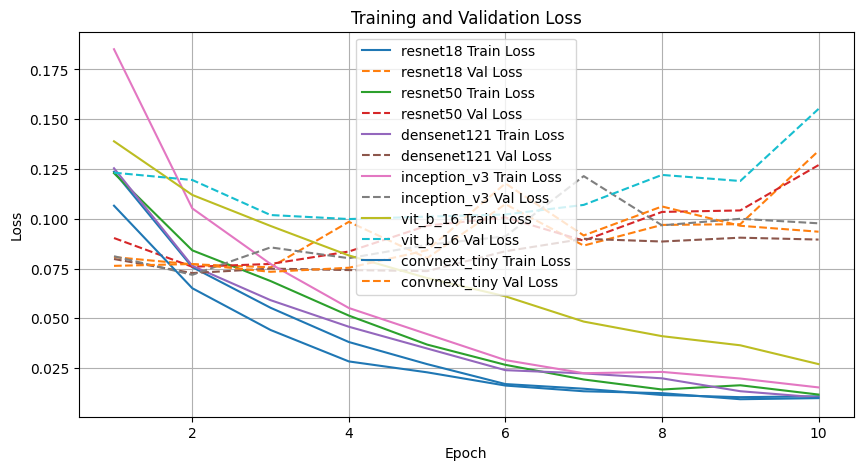

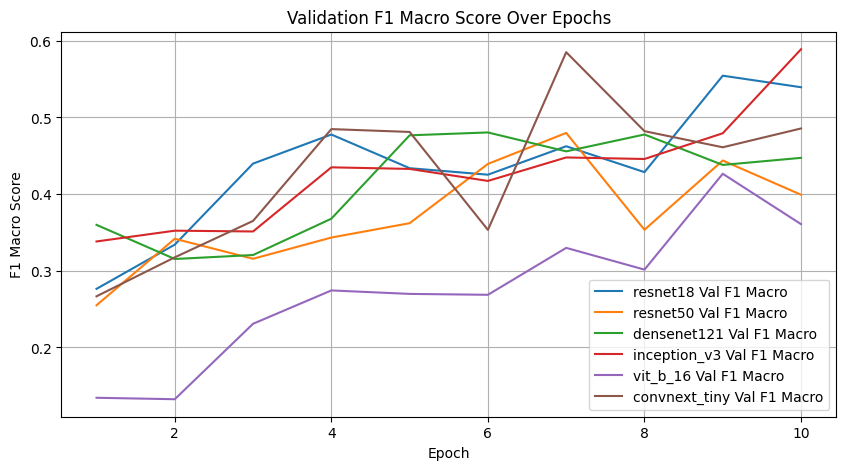

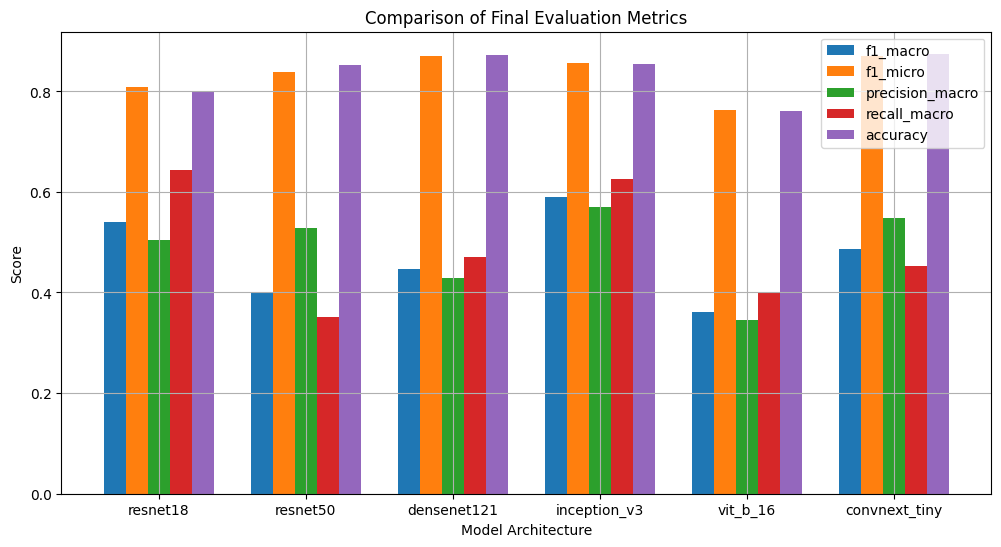

In [ ]:
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(10, 5))
for arch in architectures:
    plt.plot(epochs, all_histories[arch]['train_loss'], label=f'{arch} Train Loss')
    plt.plot(epochs, all_histories[arch]['val_loss'], '--', label=f'{arch} Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
for arch in architectures:
    plt.plot(epochs, all_histories[arch]['val_f1_macro'], label=f'{arch} Val F1 Macro')
plt.xlabel('Epoch')
plt.ylabel('F1 Macro Score')
plt.title('Validation F1 Macro Score Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

metrics_to_plot = ['f1_macro', 'f1_micro', 'precision_macro', 'recall_macro', 'accuracy']
x = np.arange(len(architectures))
width = 0.15

plt.figure(figsize=(12, 6))
for i, metric in enumerate(metrics_to_plot):
    scores = [final_metrics[arch][metric] for arch in architectures]
    plt.bar(x + i * width, scores, width, label=metric)

plt.xticks(x + width * (len(metrics_to_plot)-1) / 2, architectures)
plt.xlabel('Model Architecture')
plt.ylabel('Score')
plt.title('Comparison of Final Evaluation Metrics')
plt.legend()
plt.grid(True)
plt.show()

### **Creating a Table with Final Evaluation Metrics**

This block converts the collected evaluation metrics for each trained model architecture into a structured **pandas DataFrame** for easy inspection, comparison, and reporting.


In [ ]:
import pandas as pd

# Create a pandas DataFrame from the final_metrics dictionary.
results_df = pd.DataFrame(final_metrics).T  # Transpose so architectures are rows
results_df = results_df[['loss', 'f1_macro', 'f1_micro', 'precision_macro', 'recall_macro', 'accuracy']]
results_df.index.name = 'Architecture'
results_df.reset_index(inplace=True)

print("\nFinal Evaluation Metrics for Each Architecture:")
print(results_df)


Final Evaluation Metrics for Each Architecture:
    Architecture      loss  f1_macro  f1_micro  precision_macro  recall_macro  \
0       resnet18  0.134112  0.539389  0.809019         0.503653      0.642661   
1       resnet50  0.126966  0.399162  0.837939         0.528080      0.352066   
2    densenet121  0.089562  0.447287  0.870813         0.429268      0.471173   
3   inception_v3  0.097729  0.588971  0.856757         0.569095      0.626373   
4       vit_b_16  0.155182  0.360800  0.763106         0.345665      0.398949   
5  convnext_tiny  0.093511  0.485614  0.869253         0.547913      0.451675   

   accuracy  
0  0.799569  
1  0.852730  
2  0.872126  
3  0.854885  
4  0.760057  
5  0.875000  
